In [2]:
import os.path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM, GRU, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import plot_model

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
three_d_df = pd.read_csv("/content/drive/MyDrive/!training_set_upwork/3d_modeling.csv", index_col=0)
three_d_df.head()

,Job Title,Job_URL,EX_level_demand,Time_Limitation,Search_Keyword,Posted_from,Description,Category1_URL_search,Category_1,highlight,...,Client_Country,Connects_Num,New_Connects_Num,Rating,Feedback_Num,Payment_type,Job_Cost,Hourly_Rate,Start_rate,End_rate
4971,Senior BabylonJs Developer,https://www.upwork.com/jobs/Senior-BabylonJs-D...,Expert,"More than 6 months, Less than 30 hrs/week",Data_science,21 days ago,This person needs to have deep experience codi...,https://www.upwork.com/nx/jobs/search/?ontolog...,3D Modeling,data,...,United States,6.0,12.0,NaN,0.0,Hourly,NaN,$60.00-$70.00,$60.00,$70.00
4995,stylized house 3D,https://www.upwork.com/jobs/stylized-house-spa...,Entry level,NaN,3D,1 hour ago,I need stylized house in blender. Textures in ...,https://www.upwork.com/nx/jobs/search/?ontolog...,3D Modeling,3D,...,Spain,4.0,8.0,NaN,0.0,Fixed-price,NaN,NaN,0,NaN
4996,3D Model (PLY/OBJ/STL),https://www.upwork.com/jobs/span-span-Model-PL...,Intermediate,"Less than 1 month, Less than 30 hrs/week",3D,1 hour ago,I need a 3D model based on 150 aligned images ...,https://www.upwork.com/nx/jobs/search/?ontolog...,3D Modeling,3D,...,Spain,1.0,2.0,NaN,0.0,Hourly,NaN,NaN,0,NaN
4999,Architectural visualization,https://www.upwork.com/jobs/Architectural-visu...,Intermediate,"Less than 1 month, Less than 30 hrs/week",3D,1 hour ago,CAD designer to create a 3D model of a residen...,https://www.upwork.com/nx/jobs/search/?ontolog...,3D Modeling,3D,...,Nigeria,1.0,2.0,NaN,0.0,Hourly,NaN,NaN,0,NaN
5000,Solidworks Artist,https://www.upwork.com/jobs/Solidworks-Artist_...,Expert,"Less than 1 month, Less than 30 hrs/week",3D,2 hours ago,We have a medical device design in Solidworks ...,https://www.upwork.com/nx/jobs/search/?ontolog...,3D Modeling,3D Modeling,...,United States,2.0,4.0,4.996948,28.0,Hourly,NaN,$15.00-$40.00,$15.00,$40.00


In [5]:
three_d_df['Category_2'].value_counts().head()

3D Design           364
3D Rendering        279
3D Animation         60
3D Printing          28
Autodesk AutoCAD     23
Name: Category_2, dtype: int64

In [6]:
filtered_categories = three_d_df[three_d_df['Category_2'] == "3D Design"]
filtered_categories.head()

,Job Title,Job_URL,EX_level_demand,Time_Limitation,Search_Keyword,Posted_from,Description,Category1_URL_search,Category_1,highlight,...,Client_Country,Connects_Num,New_Connects_Num,Rating,Feedback_Num,Payment_type,Job_Cost,Hourly_Rate,Start_rate,End_rate
5000,Solidworks Artist,https://www.upwork.com/jobs/Solidworks-Artist_...,Expert,"Less than 1 month, Less than 30 hrs/week",3D,2 hours ago,We have a medical device design in Solidworks ...,https://www.upwork.com/nx/jobs/search/?ontolog...,3D Modeling,3D Modeling,...,United States,2.0,4.0,4.996948,28.0,Hourly,NaN,$15.00-$40.00,$15.00,$40.00
5008,Interior Designer for Live Streaming Set Design,https://www.upwork.com/jobs/Interior-Designer-...,Intermediate,"Less than 1 month, Less than 30 hrs/week",3D,2 hours ago,I am looking for an experienced Interior Desig...,https://www.upwork.com/nx/jobs/search/?ontolog...,3D Modeling,3D Modeling,...,United States,2.0,4.0,NaN,0.0,Hourly,NaN,$15.00-$35.00,$15.00,$35.00
5033,3d Cylinder with louvres,https://www.upwork.com/jobs/span-span-Cylinder...,Intermediate,"Less than 1 month, Less than 30 hrs/week",3D,4 hours ago,I am seeking to do a preliminary 3-D design of...,https://www.upwork.com/nx/jobs/search/?ontolog...,3D Modeling,3d,...,Canada,1.0,2.0,NaN,0.0,Hourly,NaN,NaN,0,NaN
5037,3D Modeler with Mold Making and Casting Experi...,https://www.upwork.com/jobs/span-span-Modeler-...,Intermediate,"3 to 6 months, Less than 30 hrs/week",3D,5 hours ago,"Hi,\nWe're a small art type foundry and we are...",https://www.upwork.com/nx/jobs/search/?ontolog...,3D Modeling,3D,...,United States,6.0,12.0,4.972151,38.0,Hourly,NaN,$10.00-$30.00,$10.00,$30.00
5052,CFD of rotating motors in an open fluid container,https://www.upwork.com/jobs/CFD-rotating-motor...,Expert,NaN,3D,6 hours ago,3D CFD of two counter rotating cylinders in a ...,https://www.upwork.com/nx/jobs/search/?ontolog...,3D Modeling,3D,...,United States,4.0,8.0,4.952148,11.0,Fixed-price,NaN,NaN,0,NaN


In [7]:
# the second replace just removes repeated whitespaces

cleaned_filtered_categories = filtered_categories.copy()
cleaned_filtered_categories["Description"] = cleaned_filtered_categories["Description"].str.replace(r"[^a-zA-Z]", " ").str.replace(r"\s+", " ")
cleaned_filtered_categories.head()

<ipython-input-7-d7a20e1a3374>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  cleaned_filtered_categories["Description"] = cleaned_filtered_categories["Description"].str.replace(r"[^a-zA-Z]", " ").str.replace(r"\s+", " ")


,Job Title,Job_URL,EX_level_demand,Time_Limitation,Search_Keyword,Posted_from,Description,Category1_URL_search,Category_1,highlight,...,Client_Country,Connects_Num,New_Connects_Num,Rating,Feedback_Num,Payment_type,Job_Cost,Hourly_Rate,Start_rate,End_rate
5000,Solidworks Artist,https://www.upwork.com/jobs/Solidworks-Artist_...,Expert,"Less than 1 month, Less than 30 hrs/week",3D,2 hours ago,We have a medical device design in Solidworks ...,https://www.upwork.com/nx/jobs/search/?ontolog...,3D Modeling,3D Modeling,...,United States,2.0,4.0,4.996948,28.0,Hourly,NaN,$15.00-$40.00,$15.00,$40.00
5008,Interior Designer for Live Streaming Set Design,https://www.upwork.com/jobs/Interior-Designer-...,Intermediate,"Less than 1 month, Less than 30 hrs/week",3D,2 hours ago,I am looking for an experienced Interior Desig...,https://www.upwork.com/nx/jobs/search/?ontolog...,3D Modeling,3D Modeling,...,United States,2.0,4.0,NaN,0.0,Hourly,NaN,$15.00-$35.00,$15.00,$35.00
5033,3d Cylinder with louvres,https://www.upwork.com/jobs/span-span-Cylinder...,Intermediate,"Less than 1 month, Less than 30 hrs/week",3D,4 hours ago,I am seeking to do a preliminary D design of a...,https://www.upwork.com/nx/jobs/search/?ontolog...,3D Modeling,3d,...,Canada,1.0,2.0,NaN,0.0,Hourly,NaN,NaN,0,NaN
5037,3D Modeler with Mold Making and Casting Experi...,https://www.upwork.com/jobs/span-span-Modeler-...,Intermediate,"3 to 6 months, Less than 30 hrs/week",3D,5 hours ago,Hi We re a small art type foundry and we are l...,https://www.upwork.com/nx/jobs/search/?ontolog...,3D Modeling,3D,...,United States,6.0,12.0,4.972151,38.0,Hourly,NaN,$10.00-$30.00,$10.00,$30.00
5052,CFD of rotating motors in an open fluid container,https://www.upwork.com/jobs/CFD-rotating-motor...,Expert,NaN,3D,6 hours ago,D CFD of two counter rotating cylinders in a ...,https://www.upwork.com/nx/jobs/search/?ontolog...,3D Modeling,3D,...,United States,4.0,8.0,4.952148,11.0,Fixed-price,NaN,NaN,0,NaN


In [8]:
tokenizer = Tokenizer(char_level=False, lower=True)
tokenizer.fit_on_texts(cleaned_filtered_categories['Description'])

In [9]:
word_to_number = tokenizer.word_index
number_to_word = tokenizer.index_word

all_words = list(word_to_number.keys())

print(f"Vocabulary size: {len(all_words)}")

dataset = tokenizer.texts_to_sequences(filtered_categories["Description"])

Vocabulary size: 3936


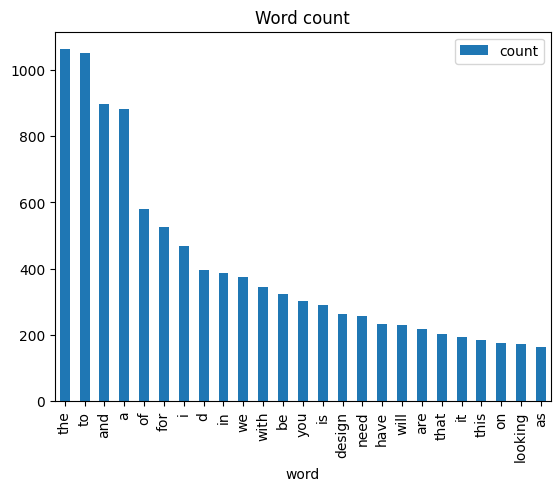

In [10]:
word_frequency = pd.DataFrame(data=tokenizer.word_counts.items(), columns=["word", "count"])
word_frequency = word_frequency.sort_values("count", ascending=False)[:25]
word_frequency.set_index("word").plot(kind="bar", rot=90, title="Word count");

In [11]:
dataset = tokenizer.texts_to_sequences(cleaned_filtered_categories["Description"])

# This is the first poem in our dataset, with its characters mapped to indices
print(dataset[0])

[10, 17, 4, 963, 209, 15, 9, 154, 3, 16, 2, 308, 29, 183, 964, 2, 1, 210, 354, 3, 438, 1287, 10, 19, 24, 6, 60, 50, 14, 567, 9, 154, 3, 27, 45, 113, 58, 20, 19, 228, 6, 168, 46, 76, 14, 762, 3, 27, 308, 29, 763, 3, 197, 1939, 2, 1, 15, 1, 210, 354, 3, 438, 1287, 162, 19, 66, 25, 130, 162, 3, 16, 2, 12, 965, 9, 154, 2, 282, 30, 209, 100]


In [12]:
# sliding window
SEQUENCE_LENGTH = 5

X = []
y = []

for job_title in dataset:
    for window_start_idx in range(len(job_title)-SEQUENCE_LENGTH):
        window_end_idx = window_start_idx + SEQUENCE_LENGTH
        X.append(job_title[window_start_idx: window_end_idx])
        y.append(job_title[window_end_idx])

X = np.array(X)
y = np.array(y)

# Let's look at the shapes
print(X.shape)
print(y.shape)

(25572, 5)
(25572,)


Let's inspect our $X$ and $y$:

In [13]:
for i in range(5):
    print("X:", X[i])
    print("y:", y[i])
    print("*******")

X: [ 10  17   4 963 209]
y: 15
*******
X: [ 17   4 963 209  15]
y: 9
*******
X: [  4 963 209  15   9]
y: 154
*******
X: [963 209  15   9 154]
y: 3
*******
X: [209  15   9 154   3]
y: 16
*******


As a sanity check, we can back-transform the indices to letters:

In [14]:
for i in range(5):
    print("X:", [number_to_word[num] for num in X[i]])
    print("y:", number_to_word[y[i]])
    print("*******")

X: ['we', 'have', 'a', 'medical', 'device']
y: design
*******
X: ['have', 'a', 'medical', 'device', 'design']
y: in
*******
X: ['a', 'medical', 'device', 'design', 'in']
y: solidworks
*******
X: ['medical', 'device', 'design', 'in', 'solidworks']
y: and
*******
X: ['device', 'design', 'in', 'solidworks', 'and']
y: need
*******


In [15]:
from sklearn.model_selection import train_test_split

# split train and validation set
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.1)

print(X_train.shape, y_train.shape)
print(X_validation.shape, y_validation.shape)

(23014, 5) (23014,)
(2558, 5) (2558,)


In [16]:
number_of_classes = len(all_words) + 1 #Important adjustment

RNN_wordlevel = Sequential([

    # embedding layer, 8-dimensional
    Embedding(number_of_classes, 32),

    # the intermediate recurrent layers should return full sequences
    GRU(64, activation='relu', return_sequences=True),
    BatchNormalization(),
    Dropout(0.15),

    # the last recurrent layer only returns the final output
    GRU(32, activation='relu', return_sequences=False),
    BatchNormalization(),
    Dropout(0.15),

    # output layer
    Dense(16, activation='relu'),
    BatchNormalization(),
    Dropout(0.15),
    Dense(number_of_classes, activation='softmax')], name="RNN_wordlevel")

In [17]:
# Compile model
RNN_wordlevel.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

In [18]:
# Display its summary
RNN_wordlevel.summary()

Model: "RNN_wordlevel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          125984    
                                                                 
 gru (GRU)                   (None, None, 64)          18816     
                                                                 
 batch_normalization (Batch  (None, None, 64)          256       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, None, 64)          0         
                                                                 
 gru_1 (GRU)                 (None, 32)                9408      
                                                                 
 batch_normalization_1 (Bat  (None, 32)                128       
 chNormalization)                                    

In [19]:
history = RNN_wordlevel.fit(X_train, y_train,
        batch_size=1024,
        epochs=100,
        validation_data=(X_validation, y_validation))

Epoch 1/100
23/23 [==============================] - 11s 244ms/step - loss: 8.2623 - accuracy: 0.0025 - val_loss: 8.2557 - val_accuracy: 0.0125
Epoch 2/100
23/23 [==============================] - 5s 204ms/step - loss: 8.1887 - accuracy: 0.0240 - val_loss: 8.2312 - val_accuracy: 0.0051
Epoch 3/100
23/23 [==============================] - 3s 145ms/step - loss: 8.1022 - accuracy: 0.0489 - val_loss: 8.2006 - val_accuracy: 0.0055
Epoch 4/100
23/23 [==============================] - 4s 161ms/step - loss: 7.9858 - accuracy: 0.0683 - val_loss: 8.1609 - val_accuracy: 0.0051
Epoch 5/100
23/23 [==============================] - 5s 229ms/step - loss: 7.8342 - accuracy: 0.0859 - val_loss: 8.1141 - val_accuracy: 0.0321
Epoch 6/100
23/23 [==============================] - 4s 180ms/step - loss: 7.6478 - accuracy: 0.1008 - val_loss: 8.0574 - val_accuracy: 0.0375
Epoch 7/100
23/23 [==============================] - 3s 152ms/step - loss: 7.4331 - accuracy: 0.1086 - val_loss: 7.9801 - val_accuracy: 0.032

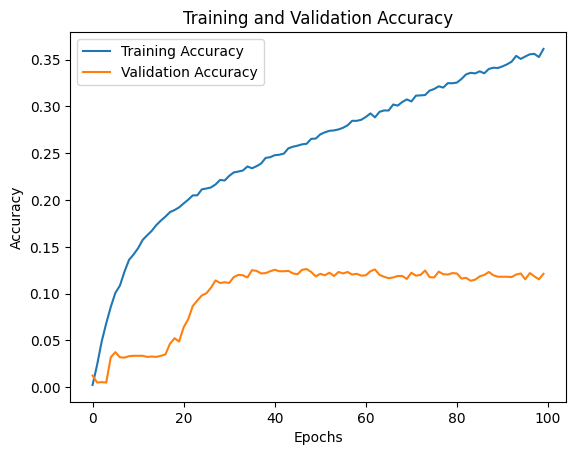

In [26]:
epochs = range(0, 100)

plt.figure()
plt.plot(epochs, history.history["accuracy"], linestyle='-', label='Training Accuracy')
plt.plot(epochs, history.history["val_accuracy"], linestyle='-', label='Validation Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.show()

In [27]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [34]:
input_phrase = "modeling unreal engine expert needed"

# process for the model
processed_phrase = tokenizer.texts_to_sequences([input_phrase])[0]

for i in range(50):
    # extract last 5 words
    network_input = np.array(processed_phrase[-SEQUENCE_LENGTH:], dtype=np.float32)
    network_input = network_input.reshape((1, SEQUENCE_LENGTH)) # shape: 1 x 5

    # the RNN gives the probability of each word as the next one
    predict_proba = RNN_wordlevel.predict(network_input, verbose=0)[0] # shape (4855,)

    # sample one word using these chances
    predicted_index = np.random.choice(number_of_classes, 1, p=predict_proba)[0]

    # add new index at the end of our list
    processed_phrase.append(predicted_index)

    # progress indicator
    print(i, end="\r")

# indices mapped to words - the method expects a list of lists so we need the extra bracket
output_phrase = tokenizer.sequences_to_texts([processed_phrase])[0]

print(output_phrase)

modeling unreal engine expert needed to stand concept for models will be developed as available there is well and parametric freelancer to hire the mouth cover payment and schedule the idea for floor to assist design on factory a hot several lighting of at absolutely ig rigging using the and questions it point inch websites
